In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('Data/Churn_Modelling.csv')

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


In [12]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# 1. Handling missing values

In [34]:
df.loc[0:10, 'Age'] = np.nan

In [14]:
print(df.isnull().sum())

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                11
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64


## 1.1 Delete Columns

In [15]:
updated_df = df.dropna(axis=1)

In [16]:
updated_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), str(3)
memory usage: 1015.8 KB


we deleted the age column completely !! 

Should only be used if there are too many null values

## 1.2 Delete Rows

In [17]:
updated_df = df.dropna(axis=0)

In [18]:
updated_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9989 entries, 11 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9989 non-null   int64  
 1   CustomerId       9989 non-null   int64  
 2   Surname          9989 non-null   str    
 3   CreditScore      9989 non-null   int64  
 4   Geography        9989 non-null   str    
 5   Gender           9989 non-null   str    
 6   Age              9989 non-null   float64
 7   Tenure           9989 non-null   int64  
 8   Balance          9989 non-null   float64
 9   NumOfProducts    9989 non-null   int64  
 10  HasCrCard        9989 non-null   int64  
 11  IsActiveMember   9989 non-null   int64  
 12  EstimatedSalary  9989 non-null   float64
 13  Exited           9989 non-null   int64  
dtypes: float64(3), int64(8), str(3)
memory usage: 1.1 MB


## 1.3 Filling the missing values - imputation

In [19]:
mean = df['Age'].mean()

In [20]:
median = df['Age'].median()

In [21]:
update_df = df
update_df['Age'] = update_df['Age'].fillna(mean) #or median 
# if we have many outliers ==> median 
# if we have less outliers ==> mean

In [22]:
update_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), str(3)
memory usage: 1.1 MB


## 1.4 Forward & Backword Filling - imputation

In [23]:
df['Age'] = df['Age'].bfill()

In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), str(3)
memory usage: 1.1 MB


# 2. Feature Scaling

In [25]:
import seaborn as sns

In [26]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), str(3)
memory usage: 1.1 MB


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,38.921414,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,38.921414,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,38.921414,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,38.921414,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,38.921414,2,125510.82,1,1,1,79084.10,0


In [35]:
new_df = pd.DataFrame(df, columns=['Age', 'Tenure'])

In [36]:
new_df.head(15)

,Age,Tenure
0,NaN,2
1,NaN,1
2,NaN,8
3,NaN,1
4,NaN,2
5,NaN,8
6,NaN,7
7,NaN,4
8,NaN,4
9,NaN,2


In [37]:
new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())

In [38]:
new_df.head(15)

,Age,Tenure
0,38.921414,2
1,38.921414,1
2,38.921414,8
3,38.921414,1
4,38.921414,2
5,38.921414,8
6,38.921414,7
7,38.921414,4
8,38.921414,4
9,38.921414,2


## 2.1 Normalization:

In [39]:
scaler = MinMaxScaler() # Instantiating the MinMaxScaler() function
normalized_df = scaler.fit_transform(new_df)
print(normalized_df)

[[0.2827218  0.2       ]
 [0.2827218  0.1       ]
 [0.2827218  0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


## 2.2 Standardization:

In [40]:
scaler = StandardScaler()
standardized_df = scaler.fit_transform(new_df)
print(standardized_df)

[[ 0.         -1.04175968]
 [ 0.         -1.38753759]
 [ 0.          1.03290776]
 ...
 [-0.27863284  0.68712986]
 [ 0.29362336 -0.69598177]
 [-1.0416411  -0.35020386]]


# 3. Outliers Treatment

In [41]:
import statistics

In [60]:
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [49]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


## 3.1 Z-score / 3-Sigma Technique (Standard Deviation)

In [73]:
def find_anomalies(data):
  anomalies = []

  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  anomaly_cut_off = random_data_std * 3

  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off

  for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)
  return anomalies

In [74]:
list1 = find_anomalies(df['EstimatedSalary'])

In [76]:
len(list1)
# (len(list1)/len(df)) * 100 ==> percentage of how much data is beyond +/- sigma (stadard deviation)
# 0% < 0.3% ==> the data is normally distributed 

0

In [75]:
len(df)

10000

In [77]:
import seaborn as sns

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

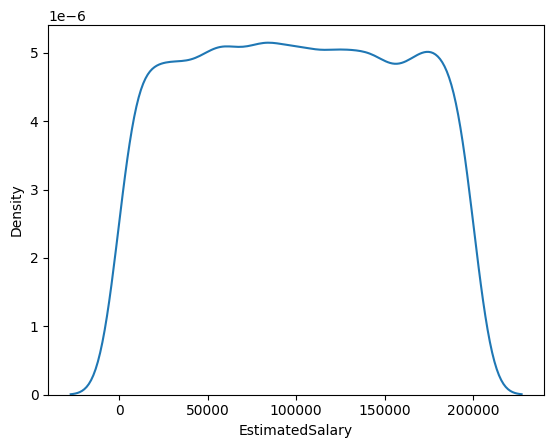

In [79]:
sns.kdeplot(df.EstimatedSalary)
# See!!

In [ ]:
# if not though we use some transformation (logarithmic scale ..)

## 3.2 Boxplots

<Axes: ylabel='EstimatedSalary'>

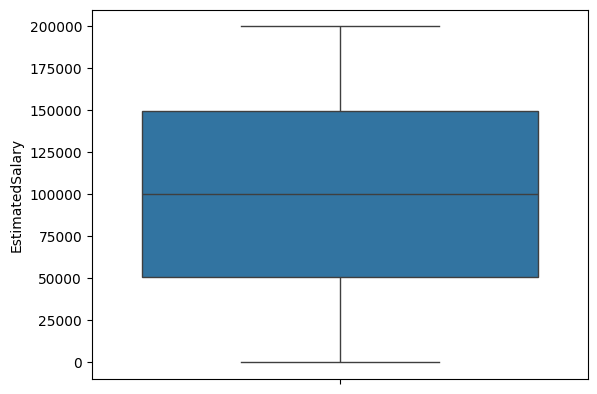

In [82]:
sns.boxplot(data=df['EstimatedSalary'])

# 4. Performing Numerical && Categorical Analysis

In [84]:
new_df = df[['Geography', 'Gender', 'Exited']]

In [88]:
new_df.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


## 4.1 Univariate Analysis

In [89]:
new_df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [90]:
new_df.Exited.value_counts()/len(new_df)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

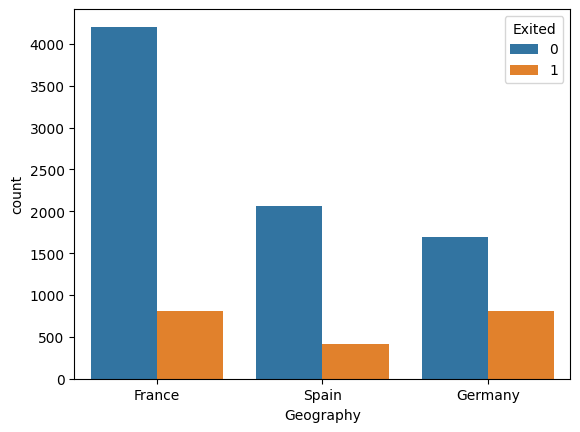

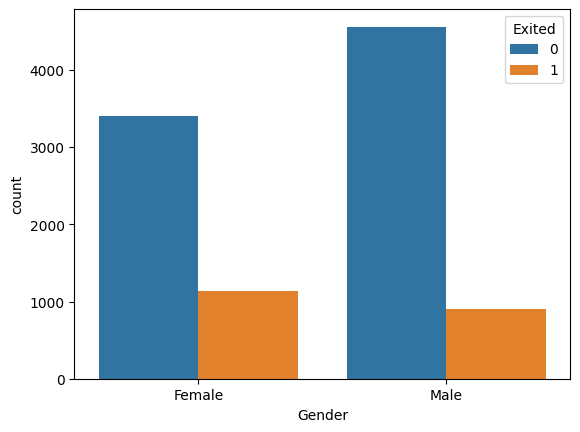

In [91]:
for i, predictor in enumerate(new_df.drop(columns=['Exited'])):
  plt.figure()
  sns.countplot(data=new_df, x=predictor, hue='Exited')

#### germany has higher churn ratio compared to the original churn ratio 
#### same for female churn ration is higher than male's

## 4.2 Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

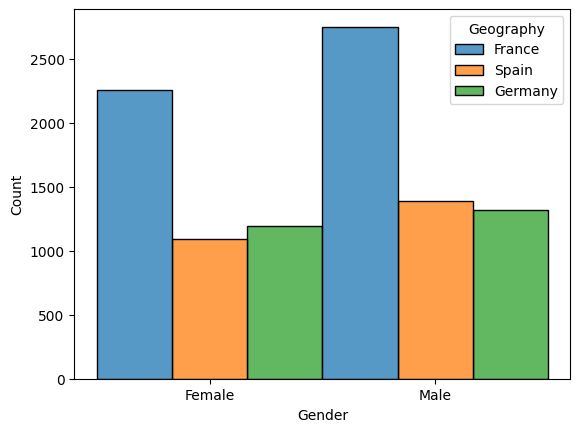

In [94]:
sns.histplot(x='Gender', hue='Geography', data=new_df, stat='count', multiple='dodge')

In [99]:
churn_df = new_df.loc[new_df['Exited'] == 1]

<Axes: xlabel='Gender', ylabel='Count'>

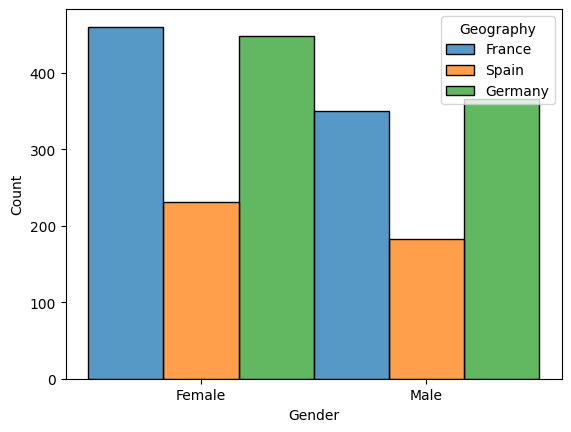

In [100]:
sns.histplot(x='Gender', hue='Geography', data=churn_df, stat='count', multiple='dodge')

## 4.3 Numerical Analysis

**Correlation ranges from -1 to 1**
- +1 --> Positive Correlation
- -1 --> Negative Correlation
- O --> No Correlation

In [105]:
df.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

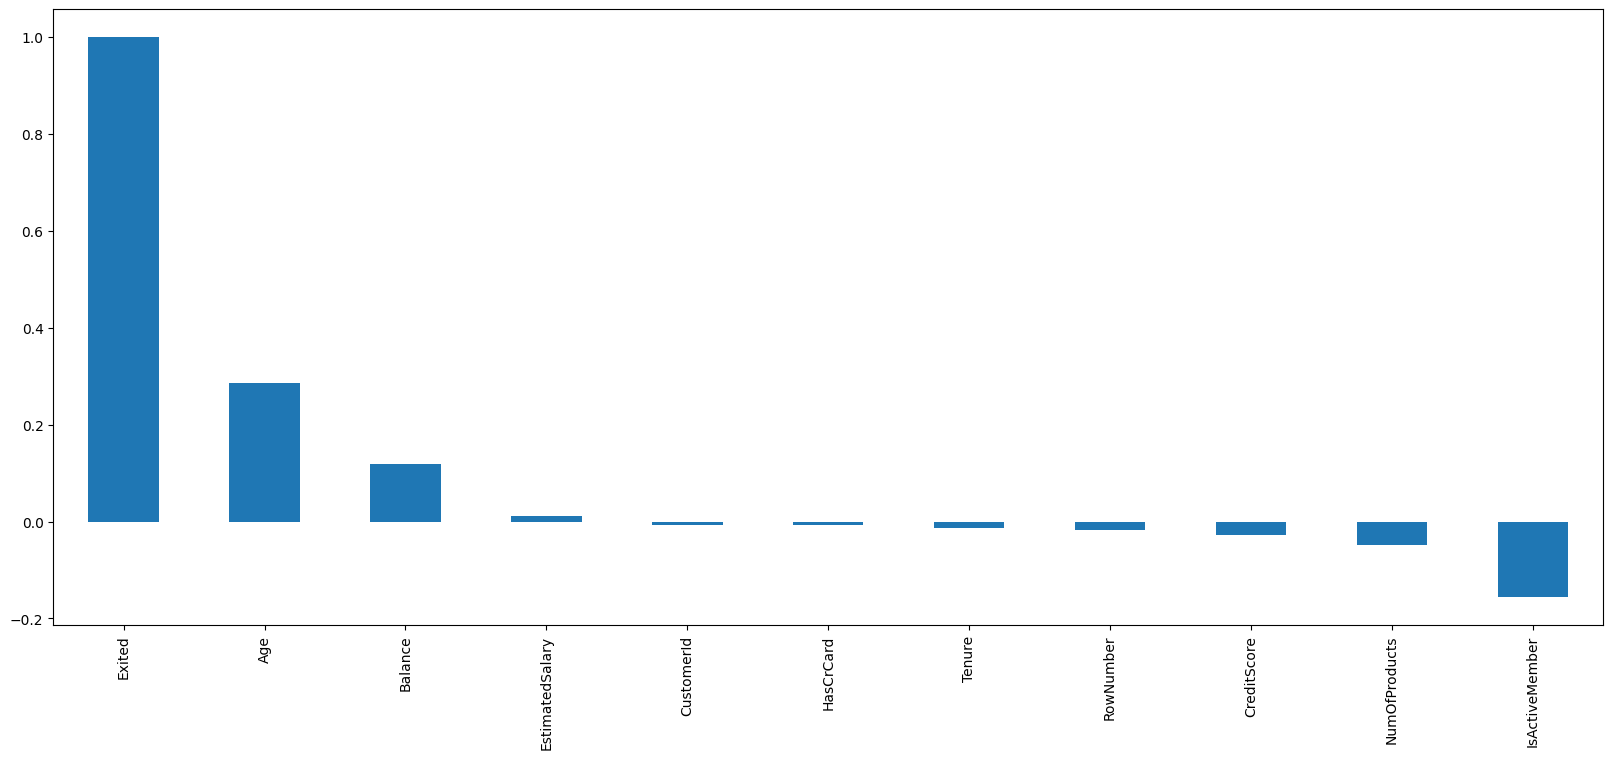

In [107]:
plt.figure(figsize=(20, 8))
df.corr(numeric_only=True)['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

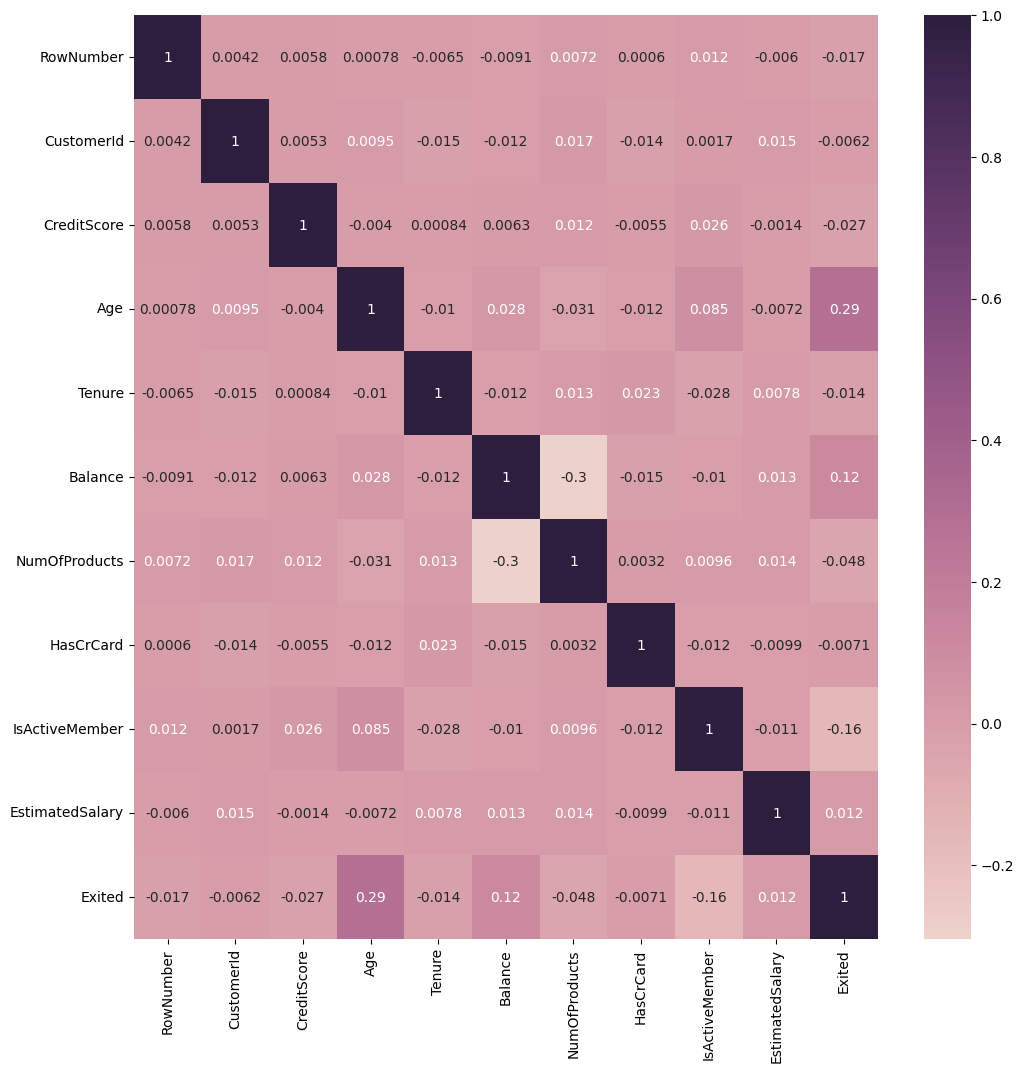

In [114]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

<Axes: xlabel='Age'>

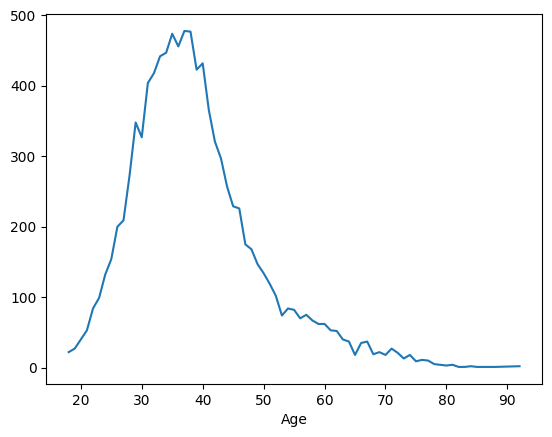

In [115]:
df['Age'].value_counts().sort_index(ascending=True).plot()

In [116]:
churn_df1 = df.loc[df['Exited'] == 1]

<Axes: xlabel='Age'>

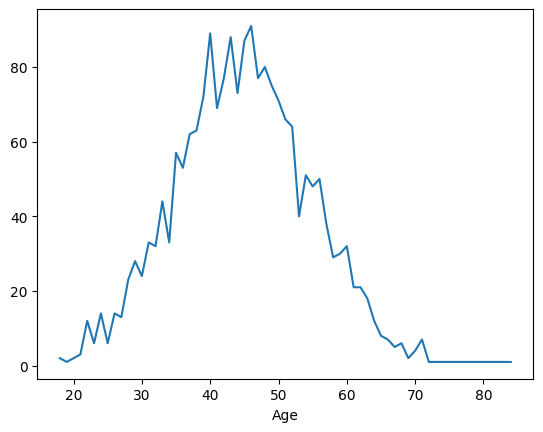

In [117]:
churn_df1['Age'].value_counts().sort_index(ascending=True).plot()

**Age is an important factor**
- senior people tend to churn more

Text(0.5, 1.0, 'Age by churn')

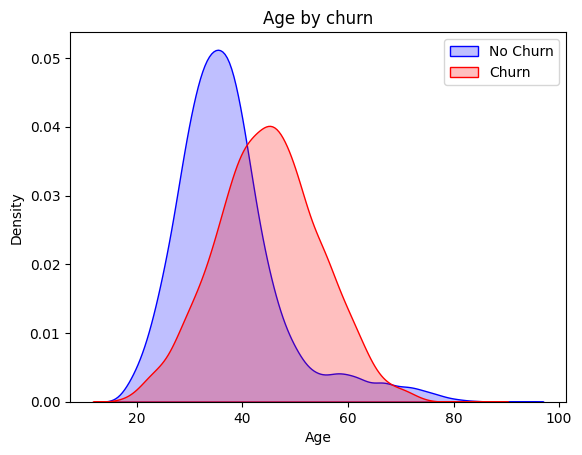

In [121]:
Tot = sns.kdeplot(df.Age[(df['Exited'] == 0)], color="Blue", fill=True)
Tot = sns.kdeplot(df.Age[(df['Exited'] == 1)], color="Red", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')

Text(0.5, 1.0, 'EstimatedSalary by churn')

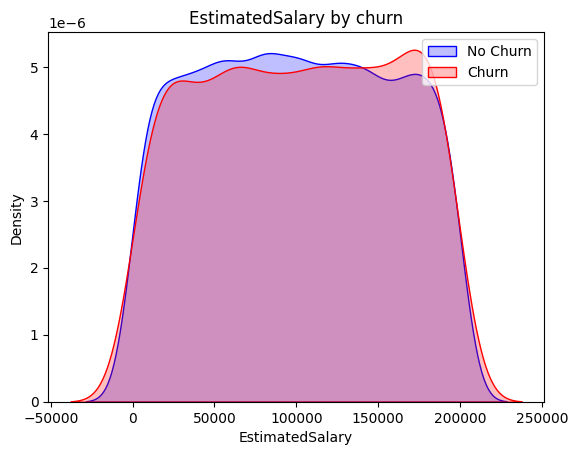

In [122]:
Tot = sns.kdeplot(df.EstimatedSalary[(df['Exited'] == 0)], color="Blue", fill=True)
Tot = sns.kdeplot(df.EstimatedSalary[(df['Exited'] == 1)], color="Red", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('EstimatedSalary')
Tot.set_title('EstimatedSalary by churn')